In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("medical_cost_insurance.csv")


In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


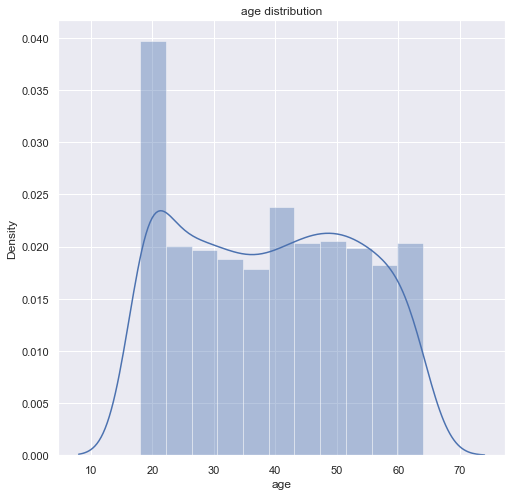

In [9]:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(df["age"])
plt.title('age distribution')
plt.show()

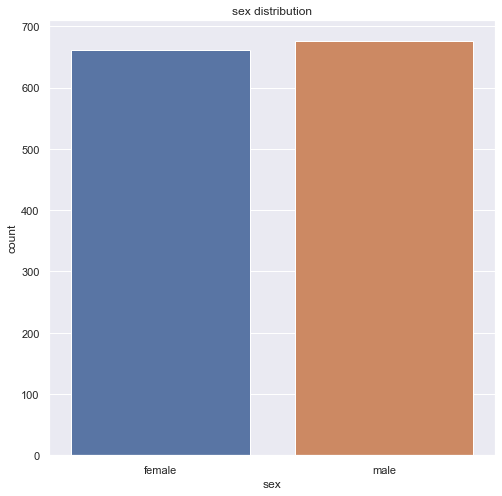

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(x="sex",data=df)
plt.title('sex distribution')
plt.show()

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

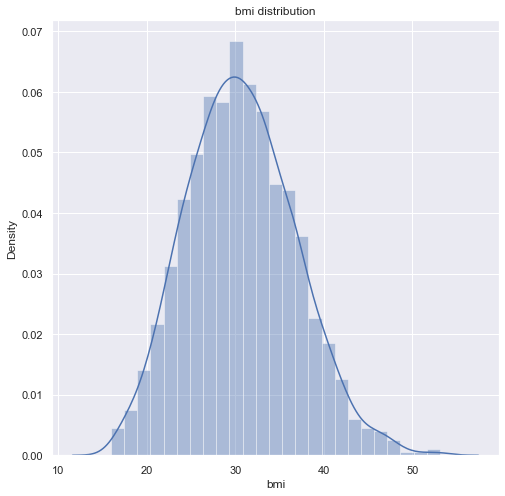

In [12]:
plt.figure(figsize=(8,8))
sns.distplot(df['bmi'])
plt.title('bmi distribution')
plt.show()

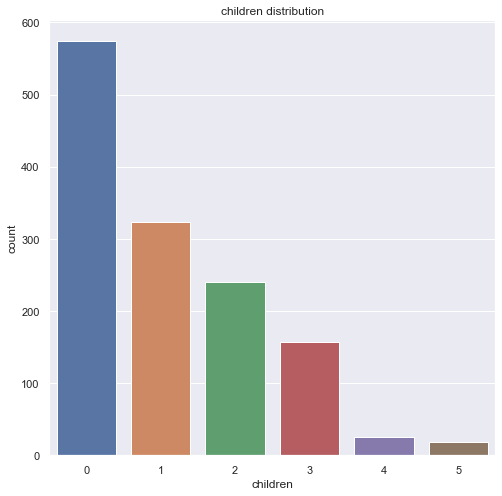

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(x='children',data=df)
plt.title('children distribution')
plt.show()

In [14]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

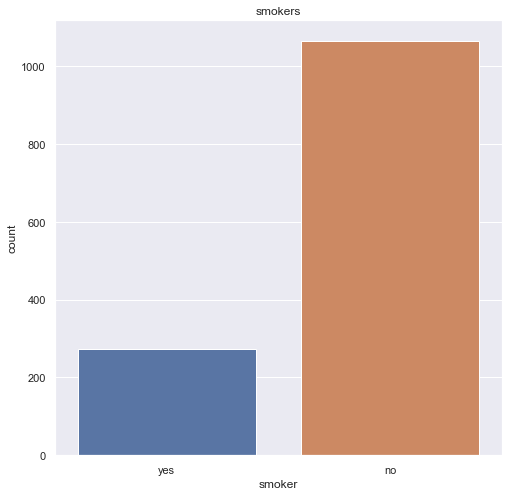

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(x='smoker',data=df)
plt.title('smokers')
plt.show()
                    

In [16]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

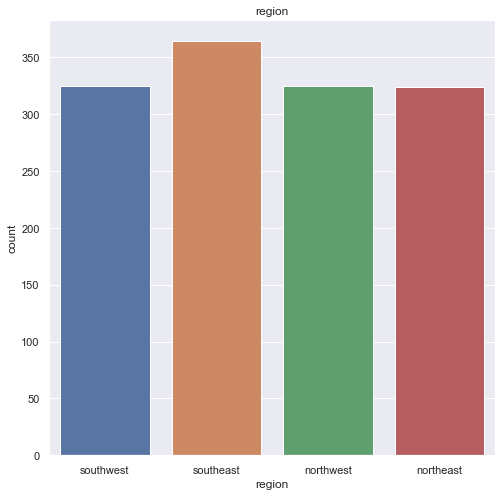

In [17]:
plt.figure(figsize=(8,8))
sns.countplot(x='region',data=df)
plt.title('region')
plt.show()
    

In [18]:
df['region'].value_counts

<bound method IndexOpsMixin.value_counts of 0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object>

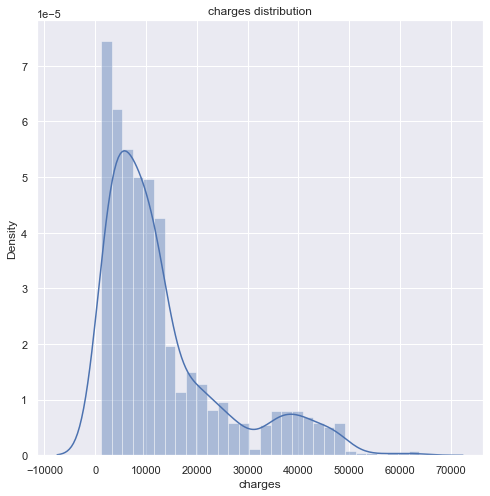

In [19]:
plt.figure(figsize=(8,8))
sns.distplot(df['charges'])
plt.title('charges distribution')
plt.show()

In [20]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [22]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [23]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [24]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
print(x.shape,x_train.shape,x_test.shape)


(1338, 6) (1070, 6) (268, 6)


In [27]:
regression=LinearRegression()

In [28]:
regression.fit(x_train,y_train)

LinearRegression()

In [29]:
training_data_prediction=regression.predict(x_train)

In [30]:
r_train=metrics.r2_score(y_train,training_data_prediction)
print(r_train)

0.751505643411174


In [31]:
test_data_prediction=regression.predict(x_test)

In [32]:
r_test=metrics.r2_score(y_test,test_data_prediction)
print(r_test)

0.7447273869684077


In [34]:
data=(19,1,27.900,0,0,1)
input_data=np.asarray(data)

input_reshape=input_data.reshape(1,-1)

prediction=regression.predict(input_reshape)
print(prediction)

[25597.73941347]
